In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

df = read_csv('data/Production_Time_Series_v1.csv')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126027 entries, 0 to 126026
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Entity ID        126027 non-null  int64  
 1   API/UWI          126027 non-null  int64  
 2   API/UWI List     125165 non-null  object 
 3   Production Date  126027 non-null  object 
 4   Liquid (bbl)     122631 non-null  float64
 5   Gas (mcf)        124516 non-null  float64
 6   Water (bbl)      119657 non-null  float64
 7   Well Count       126027 non-null  int64  
 8   Days             65218 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 8.7+ MB


In [2]:
# Convert 'Production Date' to datetime if it's not already
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Add the new column 'Prod_start_date'
df['Prod_start_date'] = df.groupby('Entity ID')['Production Date'].transform('min')

# Display the first few rows to verify the new column
df.head()

,Entity ID,API/UWI,API/UWI List,Production Date,Liquid (bbl),Gas (mcf),Water (bbl),Well Count,Days,Prod_start_date
0,129977056,42213310900000,422133109000,2016-12-01,3110.0,6988.0,0.0,1,NaN,2016-12-01
1,129977056,42213310900000,422133109000,2017-01-01,2842.0,1983.0,0.0,1,NaN,2016-12-01
2,129977056,42213310900000,422133109000,2017-02-01,1681.0,759.0,0.0,1,NaN,2016-12-01
3,129977056,42213310900000,422133109000,2017-03-01,1732.0,507.0,0.0,1,NaN,2016-12-01
4,129977056,42213310900000,422133109000,2017-04-01,965.0,1039.0,0.0,1,NaN,2016-12-01


In [3]:

df.head()

,Entity ID,API/UWI,API/UWI List,Production Date,Liquid (bbl),Gas (mcf),Water (bbl),Well Count,Days,Prod_start_date
0,129977056,42213310900000,422133109000,2016-12-01,3110.0,6988.0,0.0,1,NaN,2016-12-01
1,129977056,42213310900000,422133109000,2017-01-01,2842.0,1983.0,0.0,1,NaN,2016-12-01
2,129977056,42213310900000,422133109000,2017-02-01,1681.0,759.0,0.0,1,NaN,2016-12-01
3,129977056,42213310900000,422133109000,2017-03-01,1732.0,507.0,0.0,1,NaN,2016-12-01
4,129977056,42213310900000,422133109000,2017-04-01,965.0,1039.0,0.0,1,NaN,2016-12-01


In [4]:
# Convert 'Production Date' to datetime if it's not already
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Add the new column 'Prod_start_date'
df['Prod_start_date'] = df.groupby('Entity ID')['Production Date'].transform('min')

# Display the first few rows to verify the new column
df.head()

,Entity ID,API/UWI,API/UWI List,Production Date,Liquid (bbl),Gas (mcf),Water (bbl),Well Count,Days,Prod_start_date
0,129977056,42213310900000,422133109000,2016-12-01,3110.0,6988.0,0.0,1,NaN,2016-12-01
1,129977056,42213310900000,422133109000,2017-01-01,2842.0,1983.0,0.0,1,NaN,2016-12-01
2,129977056,42213310900000,422133109000,2017-02-01,1681.0,759.0,0.0,1,NaN,2016-12-01
3,129977056,42213310900000,422133109000,2017-03-01,1732.0,507.0,0.0,1,NaN,2016-12-01
4,129977056,42213310900000,422133109000,2017-04-01,965.0,1039.0,0.0,1,NaN,2016-12-01


In [5]:
# Rename the columns
df = df.rename(columns={
    'Entity ID': 'well_id',
    'API/UWI': 'uwi_id',
    'API/UWI List': 'uwi_list',
    'Production Date': 'production_date',
    'Liquid (bbl)': 'oil_bbl',
    'Gas (mcf)': 'gas_mcf',
    'Water (bbl)': 'water_bbl',
    'Well Count': 'well_count',
    'Days': 'production_days',
    'Prod_start_date': 'prod_start_date'
})

# Display the first few rows to verify the changes
df.head()

,well_id,uwi_id,uwi_list,production_date,oil_bbl,gas_mcf,water_bbl,well_count,production_days,prod_start_date
0,129977056,42213310900000,422133109000,2016-12-01,3110.0,6988.0,0.0,1,NaN,2016-12-01
1,129977056,42213310900000,422133109000,2017-01-01,2842.0,1983.0,0.0,1,NaN,2016-12-01
2,129977056,42213310900000,422133109000,2017-02-01,1681.0,759.0,0.0,1,NaN,2016-12-01
3,129977056,42213310900000,422133109000,2017-03-01,1732.0,507.0,0.0,1,NaN,2016-12-01
4,129977056,42213310900000,422133109000,2017-04-01,965.0,1039.0,0.0,1,NaN,2016-12-01


In [6]:
# Calculate production_days
df['production_days'] = (df['production_date'] - df['prod_start_date']).dt.days + 1

# Display the first few rows to verify the changes
df.head()

,well_id,uwi_id,uwi_list,production_date,oil_bbl,gas_mcf,water_bbl,well_count,production_days,prod_start_date
0,129977056,42213310900000,422133109000,2016-12-01,3110.0,6988.0,0.0,1,1,2016-12-01
1,129977056,42213310900000,422133109000,2017-01-01,2842.0,1983.0,0.0,1,32,2016-12-01
2,129977056,42213310900000,422133109000,2017-02-01,1681.0,759.0,0.0,1,63,2016-12-01
3,129977056,42213310900000,422133109000,2017-03-01,1732.0,507.0,0.0,1,91,2016-12-01
4,129977056,42213310900000,422133109000,2017-04-01,965.0,1039.0,0.0,1,122,2016-12-01


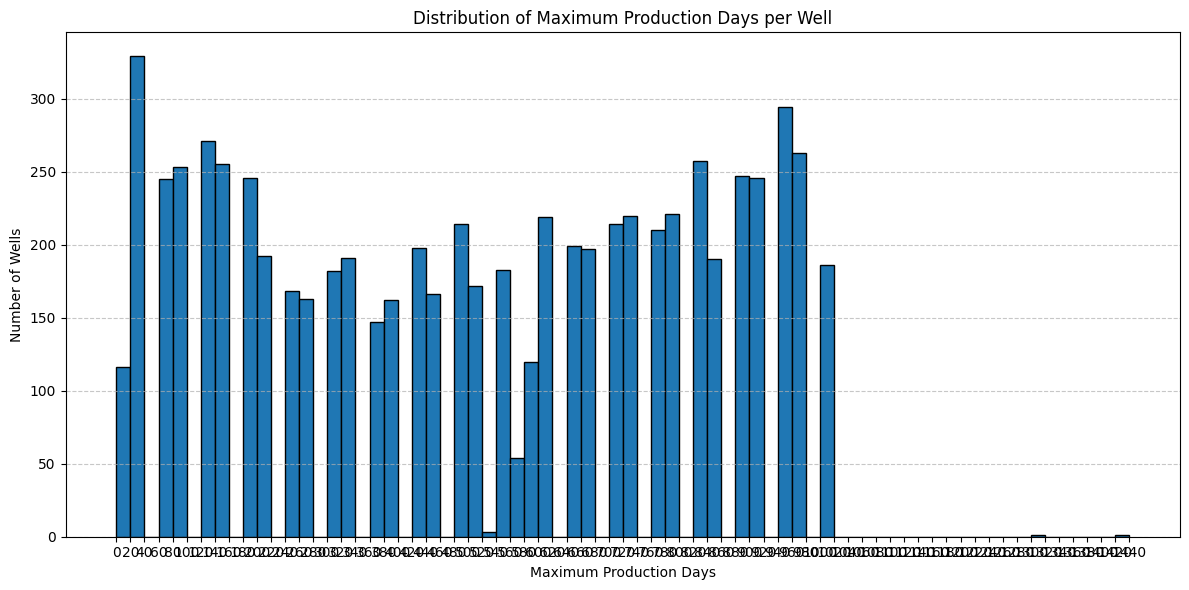

Total number of wells: 7195
Average maximum production days: 510.06
Median maximum production days: 519.00
Maximum production days: 1431.00


In [7]:
# Get the maximum production_days for each unique uwi_id
max_days_per_well = df.groupby('uwi_id')['production_days'].max()

# Create bins from 0 to the maximum value, with steps of 20
max_days = max_days_per_well.max()
bins = range(0, int(max_days) + 21, 20)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(max_days_per_well, bins=bins, edgecolor='black')

# Customize the plot
plt.title('Distribution of Maximum Production Days per Well')
plt.xlabel('Maximum Production Days')
plt.ylabel('Number of Wells')
plt.xticks(bins)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total number of wells: {len(max_days_per_well)}")
print(f"Average maximum production days: {max_days_per_well.mean():.2f}")
print(f"Median maximum production days: {max_days_per_well.median():.2f}")
print(f"Maximum production days: {max_days_per_well.max():.2f}")

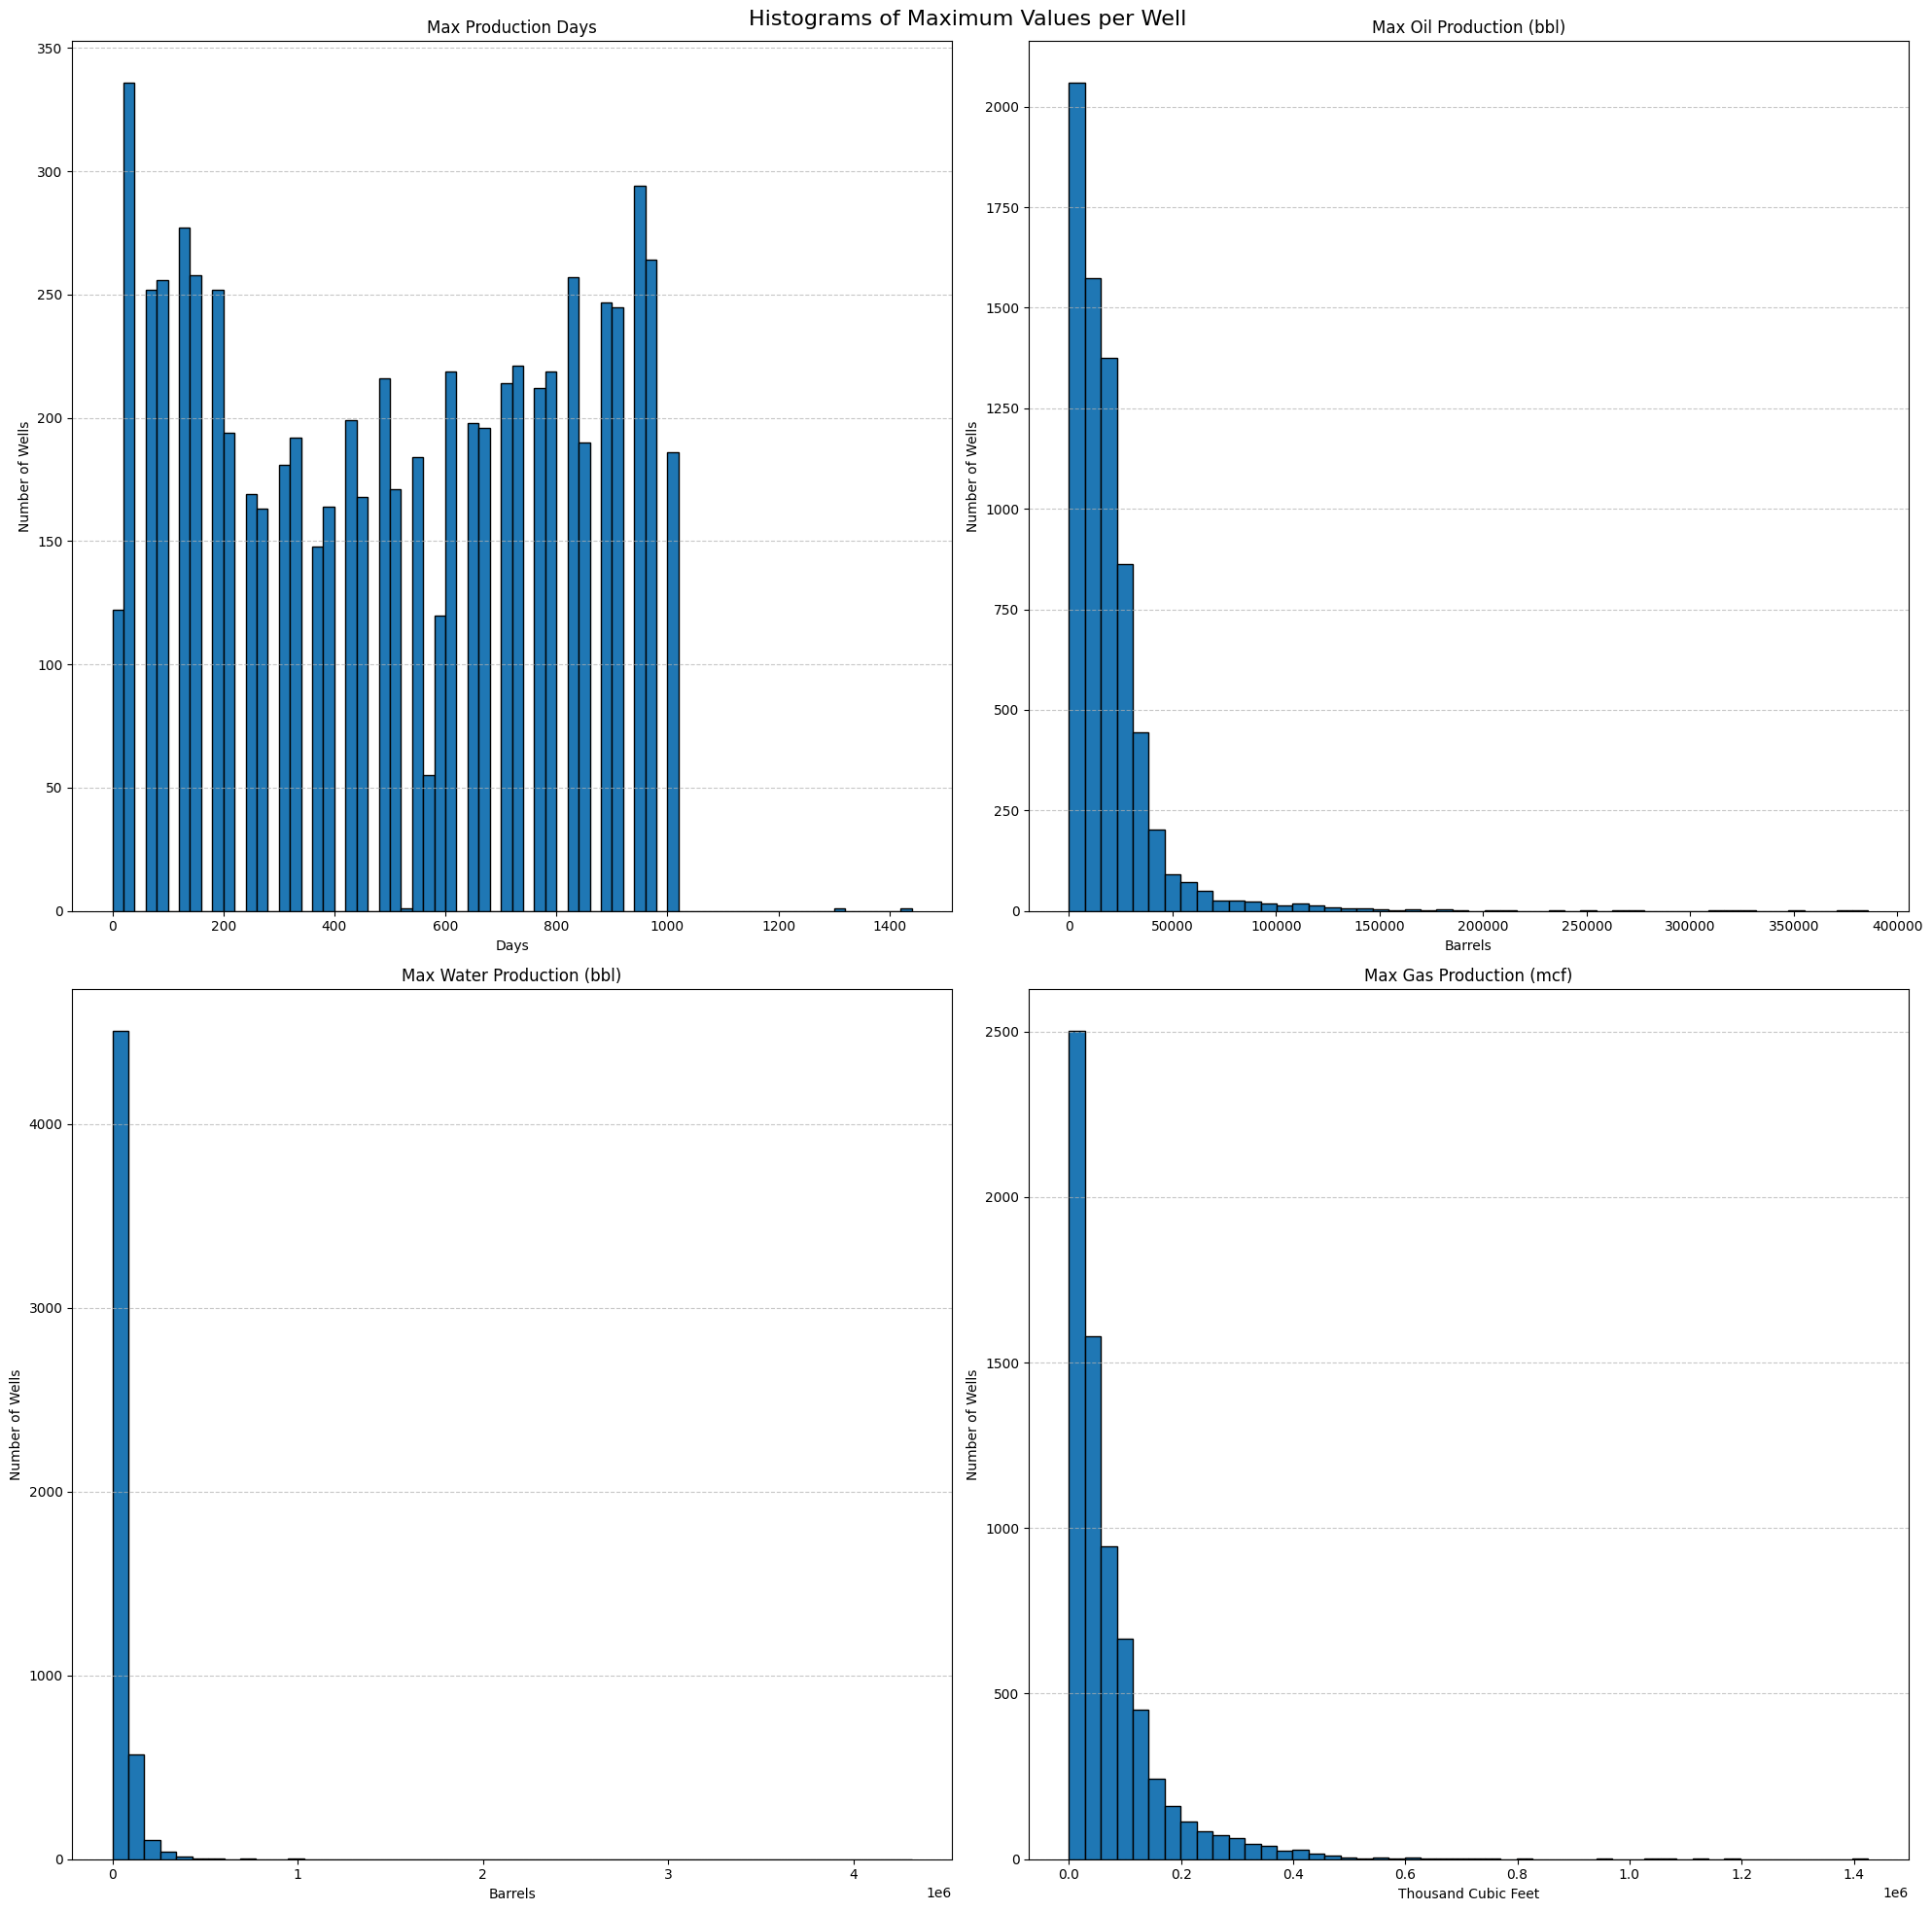

Total number of wells: 7242
Wells with oil production: 6925
Wells with water production: 5257
Wells with gas production: 7084


In [8]:
import matplotlib.pyplot as plt

# Group by well_id and calculate max values
max_values = df.groupby('well_id').agg({
    'production_days': 'max',
    'oil_bbl': 'max',
    'water_bbl': 'max',
    'gas_mcf': 'max'
})

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Histograms of Maximum Values per Well', fontsize=16)

# 1. Max production_days
axs[0, 0].hist(max_values['production_days'], bins=range(0, int(max_values['production_days'].max()) + 21, 20), edgecolor='black')
axs[0, 0].set_title('Max Production Days')
axs[0, 0].set_xlabel('Days')
axs[0, 0].set_ylabel('Number of Wells')
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Max oil_bbl (excluding zeros)
oil_data = max_values[max_values['oil_bbl'] > 0]['oil_bbl']
axs[0, 1].hist(oil_data, bins=50, edgecolor='black')
axs[0, 1].set_title('Max Oil Production (bbl)')
axs[0, 1].set_xlabel('Barrels')
axs[0, 1].set_ylabel('Number of Wells')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Max water_bbl (excluding zeros)
water_data = max_values[max_values['water_bbl'] > 0]['water_bbl']
axs[1, 0].hist(water_data, bins=50, edgecolor='black')
axs[1, 0].set_title('Max Water Production (bbl)')
axs[1, 0].set_xlabel('Barrels')
axs[1, 0].set_ylabel('Number of Wells')
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 4. Max gas_mcf (excluding zeros)
gas_data = max_values[max_values['gas_mcf'] > 0]['gas_mcf']
axs[1, 1].hist(gas_data, bins=50, edgecolor='black')
axs[1, 1].set_title('Max Gas Production (mcf)')
axs[1, 1].set_xlabel('Thousand Cubic Feet')
axs[1, 1].set_ylabel('Number of Wells')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total number of wells: {len(max_values)}")
print(f"Wells with oil production: {len(oil_data)}")
print(f"Wells with water production: {len(water_data)}")
print(f"Wells with gas production: {len(gas_data)}")

In [9]:
# Group by well_id and calculate max oil_bbl
max_oil_per_well = df.groupby('well_id')['oil_bbl'].max()

# Count wells with max oil_bbl > 0
wells_with_oil = (max_oil_per_well > 0).sum()

total_wells = len(max_oil_per_well)

print(f"Number of wells with max oil production > 0: {wells_with_oil}")
print(f"Total number of wells: {total_wells}")
print(f"Percentage of wells with oil production: {wells_with_oil / total_wells * 100:.2f}%")

Number of wells with max oil production > 0: 6925
Total number of wells: 7242
Percentage of wells with oil production: 95.62%


In [10]:
# Count the number of rows for each well_id
rows_per_well = df['well_id'].value_counts()

# Count how many wells have more than 20 rows
wells_with_more_than_20_rows = (rows_per_well > 20).sum()

total_wells = len(rows_per_well)

print(f"Number of wells with more than 20 rows of data: {wells_with_more_than_20_rows}")
print(f"Total number of wells: {total_wells}")
print(f"Percentage of wells with more than 20 rows: {wells_with_more_than_20_rows / total_wells * 100:.2f}%")


# Optional: Display distribution of row counts
print("\nDistribution of row counts:")
print(rows_per_well.describe())

Number of wells with more than 20 rows of data: 3093
Total number of wells: 7242
Percentage of wells with more than 20 rows: 42.71%

Distribution of row counts:
count    7242.000000
mean       17.402237
std        10.205331
min         1.000000
25%         8.000000
50%        18.000000
75%        27.000000
max        44.000000
Name: count, dtype: float64


In [11]:
df.head()

,well_id,uwi_id,uwi_list,production_date,oil_bbl,gas_mcf,water_bbl,well_count,production_days,prod_start_date
0,129977056,42213310900000,422133109000,2016-12-01,3110.0,6988.0,0.0,1,1,2016-12-01
1,129977056,42213310900000,422133109000,2017-01-01,2842.0,1983.0,0.0,1,32,2016-12-01
2,129977056,42213310900000,422133109000,2017-02-01,1681.0,759.0,0.0,1,63,2016-12-01
3,129977056,42213310900000,422133109000,2017-03-01,1732.0,507.0,0.0,1,91,2016-12-01
4,129977056,42213310900000,422133109000,2017-04-01,965.0,1039.0,0.0,1,122,2016-12-01


In [12]:
# Count the number of rows for each well_id
rows_per_well = df['well_id'].value_counts()

# Get wells with more than 20 rows
wells_with_more_than_20_rows = rows_per_well[rows_per_well > 20].index

# Calculate max oil production for each well
max_oil_per_well = df.groupby('well_id')['oil_bbl'].max()

# Get wells with max oil production > 0
wells_with_oil = max_oil_per_well[max_oil_per_well > 0].index

# Find wells that meet both criteria
wells_to_keep = set(wells_with_more_than_20_rows) & set(wells_with_oil)

# Create the new DataFrame
new_df = df[df['well_id'].isin(wells_to_keep)]

# Print some information about the new DataFrame
print(f"Original number of wells: {df['well_id'].nunique()}")
print(f"Number of wells in new DataFrame: {new_df['well_id'].nunique()}")
print(f"Original number of rows: {len(df)}")
print(f"Number of rows in new DataFrame: {len(new_df)}")



# Display the first few rows of the new DataFrame
new_df.head()

Original number of wells: 7242
Number of wells in new DataFrame: 2921
Original number of rows: 126027
Number of rows in new DataFrame: 80847


,well_id,uwi_id,uwi_list,production_date,oil_bbl,gas_mcf,water_bbl,well_count,production_days,prod_start_date
236,129968477,0,0,2015-11-01,369.0,7786.0,0.0,1,1,2015-11-01
237,129968477,0,0,2015-12-01,346.0,8190.0,0.0,1,31,2015-11-01
238,129968477,0,0,2016-01-01,374.0,9808.0,0.0,1,62,2015-11-01
239,129968477,0,0,2016-02-01,291.0,9035.0,0.0,1,93,2015-11-01
240,129968477,0,0,2016-03-01,278.0,11174.0,0.0,1,122,2015-11-01



Well ID: 129089097
Number of data points: 33
Date range: 2015-02-01 00:00:00 to 2017-10-01 00:00:00
Average daily production: 4778.79 bbl
Maximum daily production: 14240.00 bbl

Well ID: 129592663
Number of data points: 21
Date range: 2016-02-01 00:00:00 to 2017-10-01 00:00:00
Average daily production: 173.76 bbl
Maximum daily production: 227.00 bbl

Well ID: 129604748
Number of data points: 23
Date range: 2015-12-01 00:00:00 to 2017-10-01 00:00:00
Average daily production: 7376.35 bbl
Maximum daily production: 27959.00 bbl

Well ID: 129778839
Number of data points: 29
Date range: 2015-05-01 00:00:00 to 2017-09-01 00:00:00
Average daily production: 3464.62 bbl
Maximum daily production: 10577.00 bbl


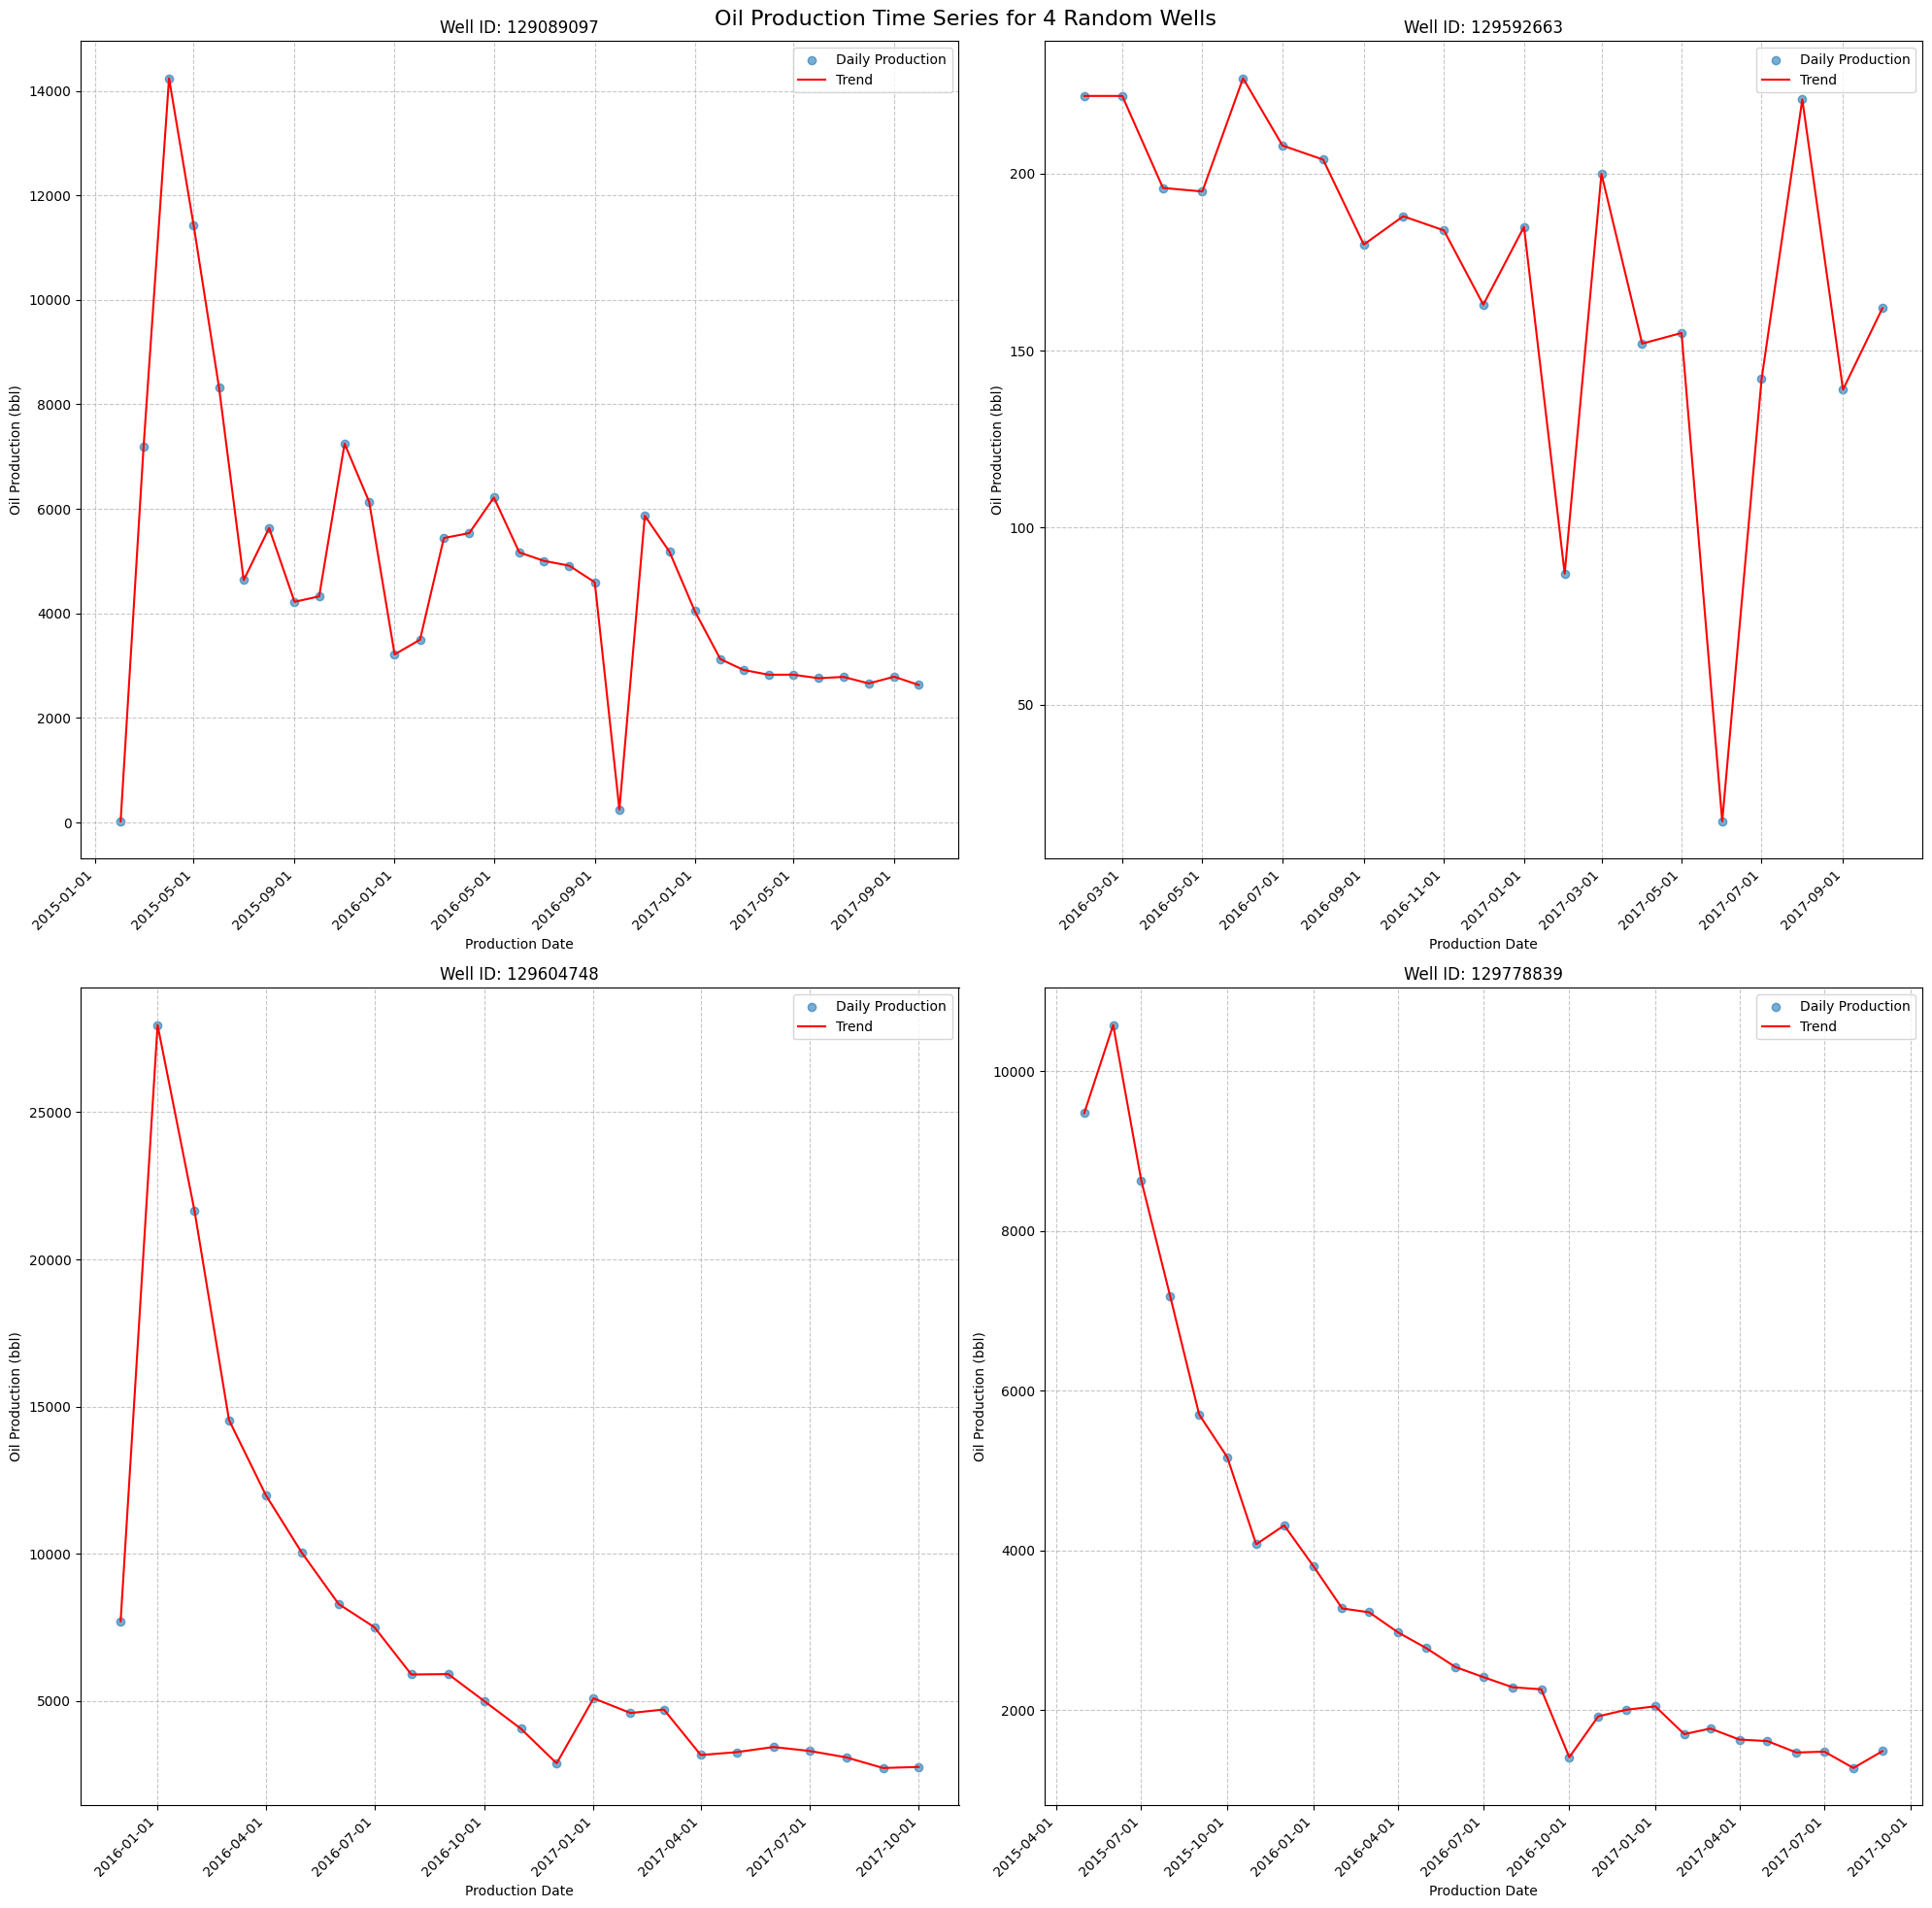

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import random
import pandas as pd

# Select 4 random wells
random_wells = random.sample(list(new_df['well_id'].unique()), 4)

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Oil Production Time Series for 4 Random Wells', fontsize=16)

# Flatten the axs array for easier iteration
axs = axs.flatten()

for i, well in enumerate(random_wells):
    # Get data for the current well
    well_data = new_df[new_df['well_id'] == well].sort_values('production_date')
    
    print(f"\nWell ID: {well}")
    print(f"Number of data points: {len(well_data)}")
    
    if len(well_data) > 0:
        # Ensure production_date is datetime
        well_data['production_date'] = pd.to_datetime(well_data['production_date'])
        
        # Create scatter plot
        axs[i].scatter(well_data['production_date'], well_data['oil_bbl'], 
                       alpha=0.6, label='Daily Production')
        
        # Create line plot
        axs[i].plot(well_data['production_date'], well_data['oil_bbl'], 
                    color='red', label='Trend')
        
        # Customize the plot
        axs[i].set_title(f'Well ID: {well}')
        axs[i].set_xlabel('Production Date')
        axs[i].set_ylabel('Oil Production (bbl)')
        axs[i].legend()
        axs[i].grid(True, linestyle='--', alpha=0.7)
        
        # Format x-axis as dates
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axs[i].xaxis.set_major_locator(mdates.AutoDateLocator())
        
        # Rotate x-axis labels for better readability
        plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        print(f"Date range: {well_data['production_date'].min()} to {well_data['production_date'].max()}")
        print(f"Average daily production: {well_data['oil_bbl'].mean():.2f} bbl")
        print(f"Maximum daily production: {well_data['oil_bbl'].max():.2f} bbl")
    else:
        print("No data available for this well")
        axs[i].text(0.5, 0.5, 'No data available', ha='center', va='center')

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd

# Ensure production_date is in datetime format
new_df['production_date'] = pd.to_datetime(new_df['production_date'])

# Group by well_id and find the apex (maximum oil production)
apex_data = new_df.loc[new_df.groupby('well_id')['oil_bbl'].idxmax()]

# Create a dictionary with apex information for each well
apex_dict = apex_data.set_index('well_id')[['oil_bbl', 'production_date']].to_dict('index')

# Function to add apex information and calculate days after apex
def add_apex_info(row):
    well_apex = apex_dict[row['well_id']]
    row['apex_bbl'] = well_apex['oil_bbl']
    row['apex_date'] = well_apex['production_date']
    row['production_days_after_apex'] = (row['production_date'] - row['apex_date']).days
    return row

# Apply the function to add apex information
new_df = new_df.apply(add_apex_info, axis=1)

# Sort the DataFrame by well_id and production_date
new_df = new_df.sort_values(['well_id', 'production_date'])

# Display the first few rows of the updated DataFrame
print(new_df[['well_id', 'production_date', 'oil_bbl', 'apex_bbl', 'apex_date', 'production_days_after_apex']].head(10))

# Print some statistics
print("\nStatistics:")
print(f"Number of wells: {new_df['well_id'].nunique()}")
print(f"Average apex production: {new_df['apex_bbl'].mean():.2f} bbl")
print(f"Median days to reach apex: {new_df.groupby('well_id')['production_days_after_apex'].min().median():.0f} days")

/var/folders/nb/f4s8fppj0j3gshk7xfn2cwf00000gn/T/ipykernel_36932/2022025368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['production_date'] = pd.to_datetime(new_df['production_date'])


        well_id production_date  oil_bbl  apex_bbl  apex_date  \
119514  -189988      2016-02-01   2728.0   24944.0 2016-03-01   
119515  -189988      2016-03-01  24944.0   24944.0 2016-03-01   
119516  -189988      2016-04-01  13606.0   24944.0 2016-03-01   
119517  -189988      2016-05-01   9672.0   24944.0 2016-03-01   
119518  -189988      2016-06-01   7716.0   24944.0 2016-03-01   
119519  -189988      2016-07-01   6723.0   24944.0 2016-03-01   
119520  -189988      2016-08-01   5854.0   24944.0 2016-03-01   
119521  -189988      2016-09-01   5296.0   24944.0 2016-03-01   
119522  -189988      2016-10-01   4671.0   24944.0 2016-03-01   
119523  -189988      2016-11-01   3981.0   24944.0 2016-03-01   

        production_days_after_apex  
119514                         -29  
119515                           0  
119516                          31  
119517                          61  
119518                          92  
119519                         122  
119520                   

In [15]:
new_df.head()

,well_id,uwi_id,uwi_list,production_date,oil_bbl,gas_mcf,water_bbl,well_count,production_days,prod_start_date,apex_bbl,apex_date,production_days_after_apex
119514,-189988,42041324380000,420413243800,2016-02-01,2728.0,7469.0,0.0,1,1,2016-02-01,24944.0,2016-03-01,-29
119515,-189988,42041324380000,420413243800,2016-03-01,24944.0,78107.0,0.0,1,30,2016-02-01,24944.0,2016-03-01,0
119516,-189988,42041324380000,420413243800,2016-04-01,13606.0,52354.0,0.0,1,61,2016-02-01,24944.0,2016-03-01,31
119517,-189988,42041324380000,420413243800,2016-05-01,9672.0,38441.0,0.0,1,91,2016-02-01,24944.0,2016-03-01,61
119518,-189988,42041324380000,420413243800,2016-06-01,7716.0,28326.0,0.0,1,122,2016-02-01,24944.0,2016-03-01,92


In [16]:
new_df.to_csv('data/Production_Time_Series_prepared.csv', index=False)

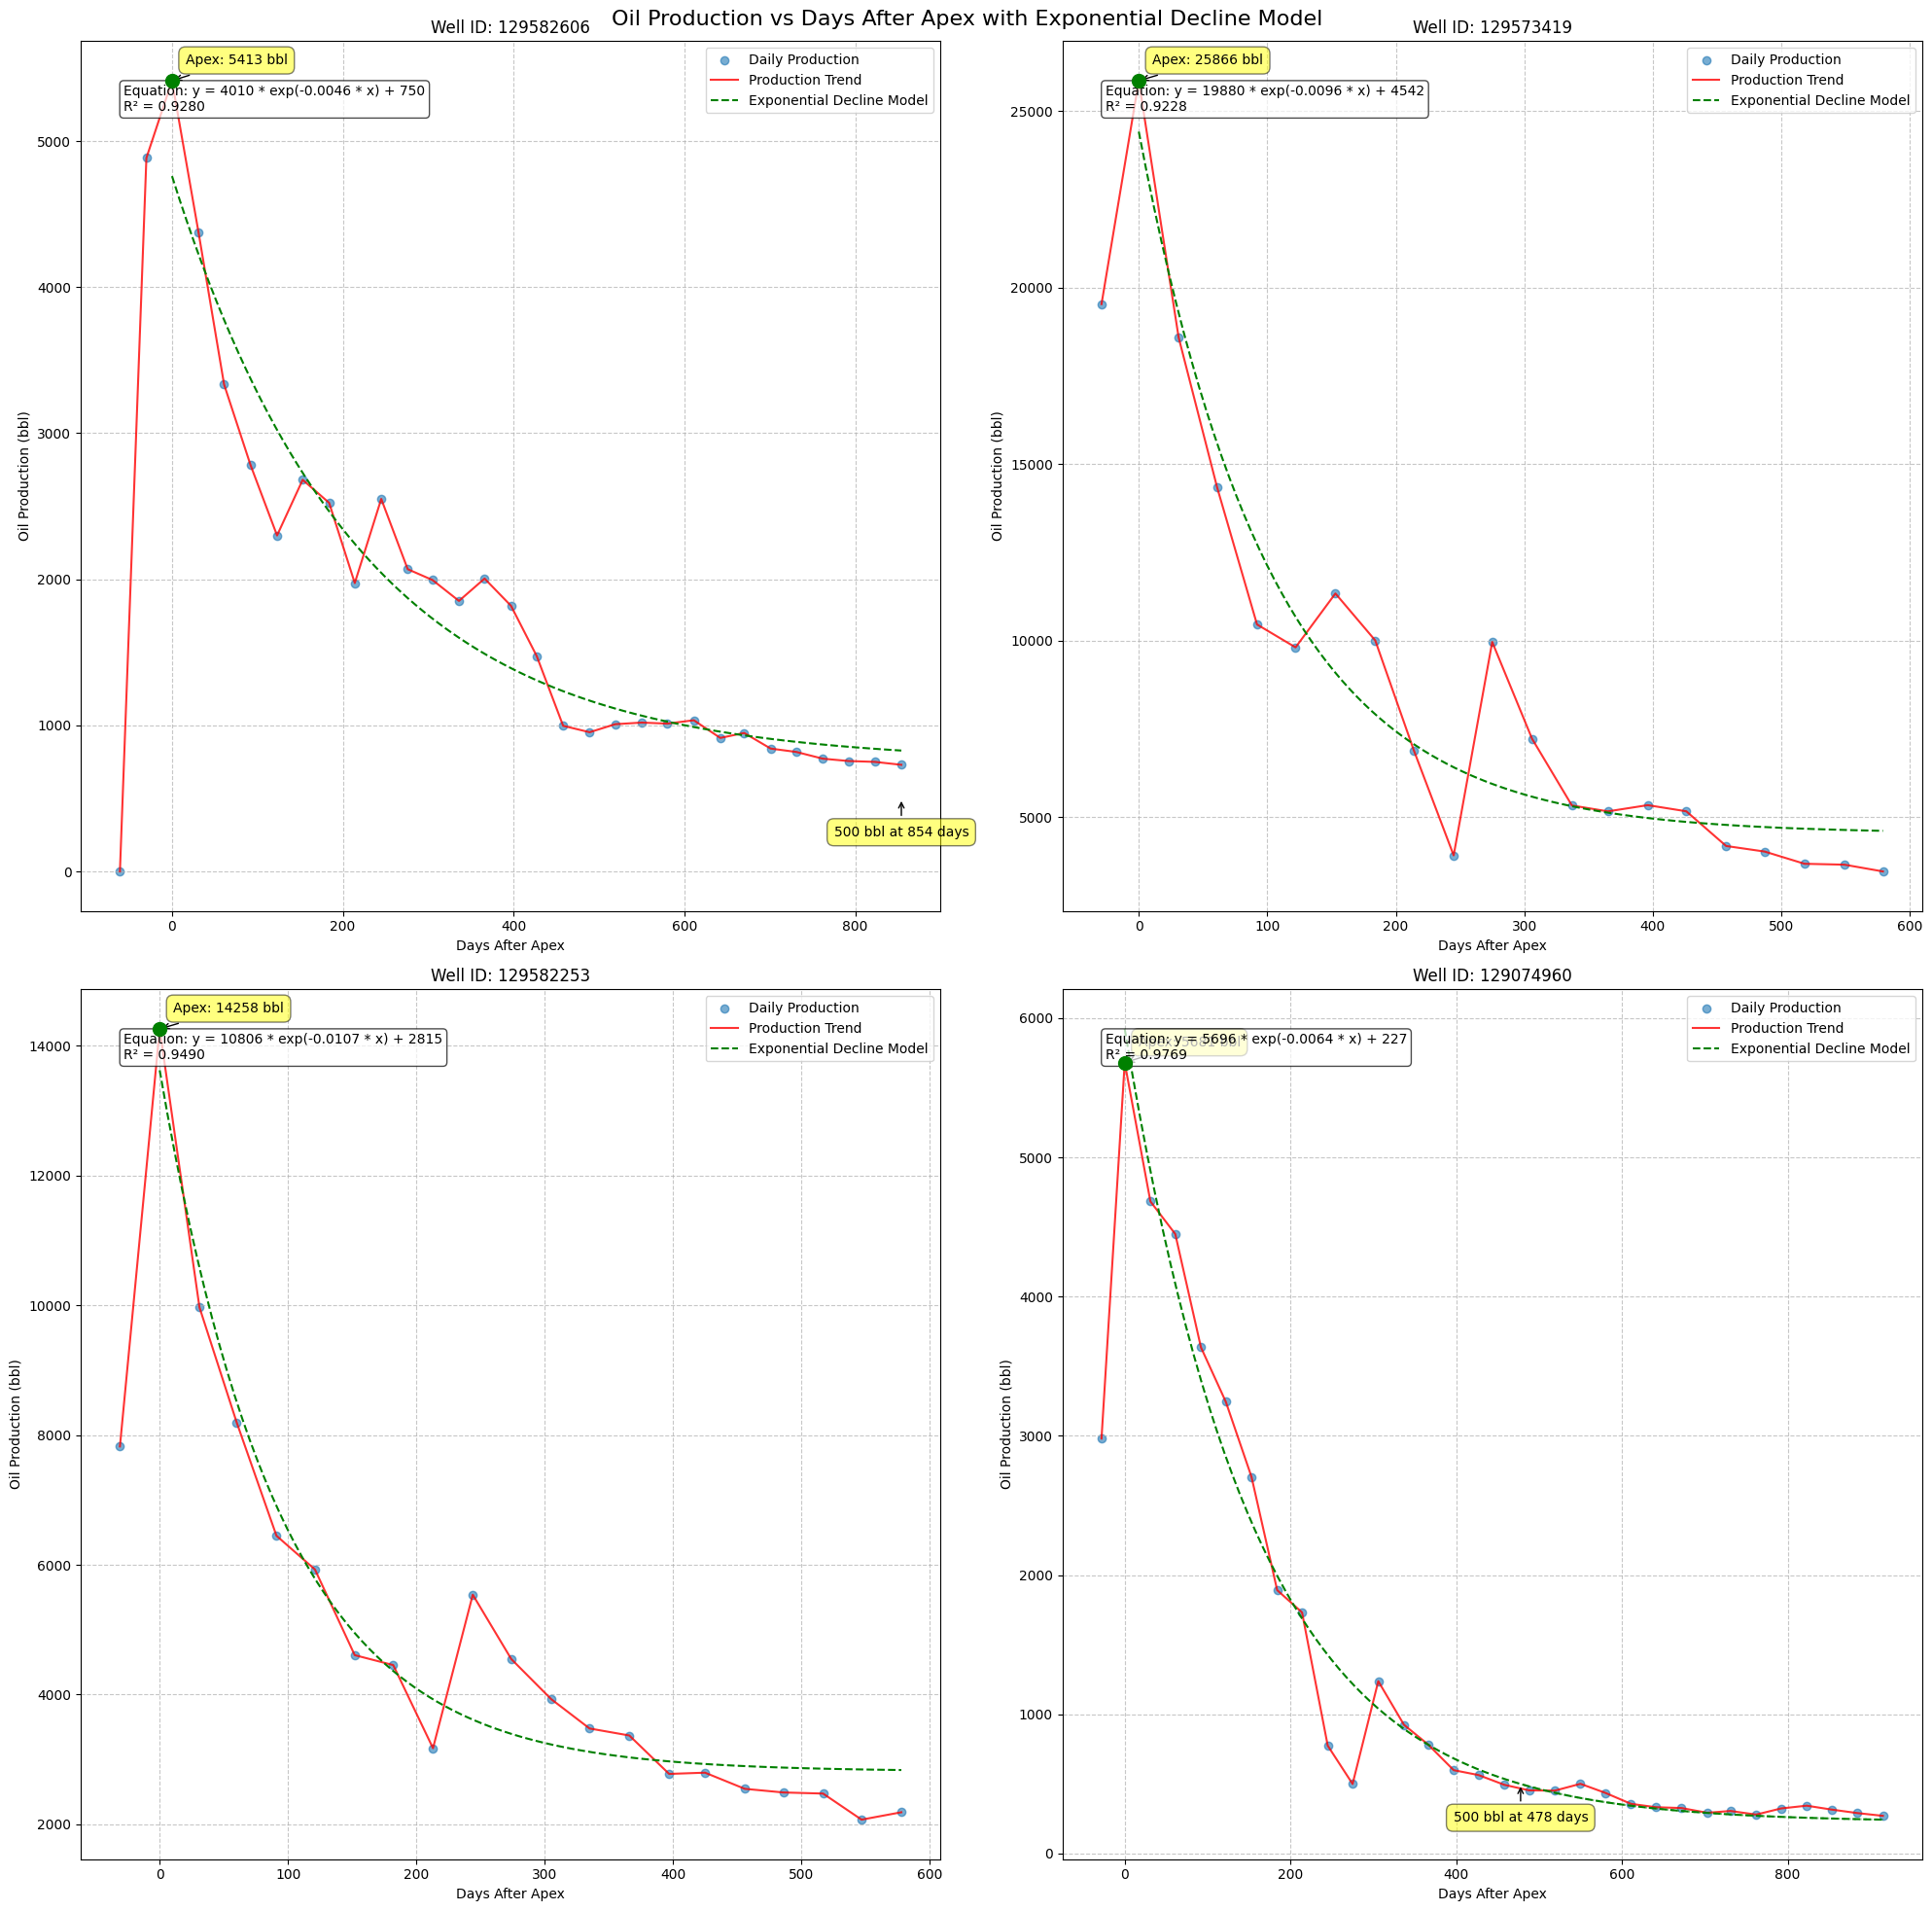


Well ID: 129582606
Apex production: 5413 bbl
Apex date: 2015-05-01
Production duration: 915 days
Days to reach 500 bbl (model): 9999

Well ID: 129573419
Apex production: 25866 bbl
Apex date: 2016-03-01
Production duration: 608 days
Days to reach 500 bbl (model): 9999

Well ID: 129582253
Apex production: 14258 bbl
Apex date: 2016-01-01
Production duration: 609 days
Days to reach 500 bbl (model): 9999

Well ID: 129074960
Apex production: 5681 bbl
Apex date: 2015-03-01
Production duration: 943 days
Days to reach 500 bbl (model): 478


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Select 4 random well_ids
random_wells = np.random.choice(new_df['well_id'].unique(), 4, replace=False)

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Oil Production vs Days After Apex with Exponential Decline Model', fontsize=16)

# Flatten the axs array for easier iteration
axs = axs.flatten()

for i, well_id in enumerate(random_wells):
    # Get data for the current well
    well_data = new_df[new_df['well_id'] == well_id].sort_values('production_days_after_apex')
    
    # Filter data from apex onwards
    apex_data = well_data[well_data['production_days_after_apex'] >= 0]
    
    # Scatter plot
    axs[i].scatter(well_data['production_days_after_apex'], well_data['oil_bbl'], 
                   alpha=0.6, label='Daily Production')
    
    # Line plot
    axs[i].plot(well_data['production_days_after_apex'], well_data['oil_bbl'], 
                color='red', alpha=0.8, label='Production Trend')
    
    # Fit exponential decay
    popt, _ = curve_fit(exp_decay, apex_data['production_days_after_apex'], apex_data['oil_bbl'], 
                        p0=[apex_data['oil_bbl'].max(), 0.01, 100], maxfev=5000)
    
    # Calculate R-squared
    residuals = apex_data['oil_bbl'] - exp_decay(apex_data['production_days_after_apex'], *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((apex_data['oil_bbl'] - np.mean(apex_data['oil_bbl']))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Generate points for the trend line
    x_fit = np.linspace(0, well_data['production_days_after_apex'].max(), 100)
    y_fit = exp_decay(x_fit, *popt)
    
    # Find where the trend line reaches 500 bbl
    x_500 = np.interp(500, y_fit[::-1], x_fit[::-1])
    
    # Plot trend line
    axs[i].plot(x_fit, y_fit, 'g--', label='Exponential Decline Model')
    
    # Extend trend line to 500 bbl
    x_extend = np.linspace(well_data['production_days_after_apex'].max(), x_500, 50)
    y_extend = exp_decay(x_extend, *popt)
    axs[i].plot(x_extend, y_extend, 'g:', alpha=0.5)
    
    # Customize the plot
    axs[i].set_title(f'Well ID: {well_id}')
    axs[i].set_xlabel('Days After Apex')
    axs[i].set_ylabel('Oil Production (bbl)')
    axs[i].legend()
    axs[i].grid(True, linestyle='--', alpha=0.7)
    
    # Add apex point
    apex_point = well_data[well_data['production_days_after_apex'] == 0]
    axs[i].scatter(0, apex_point['oil_bbl'].values[0], color='green', s=100, 
                   label='Apex', zorder=5)
    
    # Annotate apex value
    axs[i].annotate(f"Apex: {apex_point['oil_bbl'].values[0]:.0f} bbl", 
                    xy=(0, apex_point['oil_bbl'].values[0]), 
                    xytext=(10, 10), textcoords='offset points', 
                    ha='left', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    # Display equation and R-squared
    equation = f"y = {popt[0]:.0f} * exp(-{popt[1]:.4f} * x) + {popt[2]:.0f}"
    axs[i].text(0.05, 0.95, f"Equation: {equation}\nR² = {r_squared:.4f}", 
                transform=axs[i].transAxes, verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Annotate 500 bbl point
    axs[i].annotate(f"500 bbl at {x_500:.0f} days", 
                    xy=(x_500, 500), 
                    xytext=(0, -20), textcoords='offset points', 
                    ha='center', va='top',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

# Print some information about the plotted wells
for well_id in random_wells:
    well_data = new_df[new_df['well_id'] == well_id]
    print(f"\nWell ID: {well_id}")
    print(f"Apex production: {well_data['apex_bbl'].iloc[0]:.0f} bbl")
    print(f"Apex date: {well_data['apex_date'].iloc[0].strftime('%Y-%m-%d')}")
    print(f"Production duration: {well_data['production_days_after_apex'].max() - well_data['production_days_after_apex'].min()} days")
    
    # Calculate days to reach 500 bbl
    apex_data = well_data[well_data['production_days_after_apex'] >= 0]
    popt, _ = curve_fit(exp_decay, apex_data['production_days_after_apex'], apex_data['oil_bbl'], 
                        p0=[apex_data['oil_bbl'].max(), 0.01, 100], maxfev=5000)
    x_500 = np.interp(500, exp_decay(np.arange(0, 10000), *popt)[::-1], np.arange(0, 10000)[::-1])
    print(f"Days to reach 500 bbl (model): {x_500:.0f}")

/Users/adrien/Library/Caches/pypoetry/virtualenvs/adrien-6aYD2FAF-py3.12/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
/var/folders/nb/f4s8fppj0j3gshk7xfn2cwf00000gn/T/ipykernel_36932/1792621504.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(model_func, x, y, p0=p0, bounds=bounds, maxfev=10000)
/var/folders/nb/f4s8fppj0j3gshk7xfn2cwf00000gn/T/ipykernel_36932/1792621504.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(model_func, x, y, p0=p0, bounds=bounds, maxfev=10000)
/Users/adrien/Library/Caches/pypoetry/virtualenvs/adrien-6aYD2FAF-py3.12/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
/Users/adrien/Library/Caches/pypoetry/virtualenvs/adrien-6aYD2FAF-py3.12/lib

Total number of wells: 2921
Wells with successful Exponential fit: 2741
Wells with successful Harmonic fit: 2741
Wells with successful Hyperbolic fit: 2741


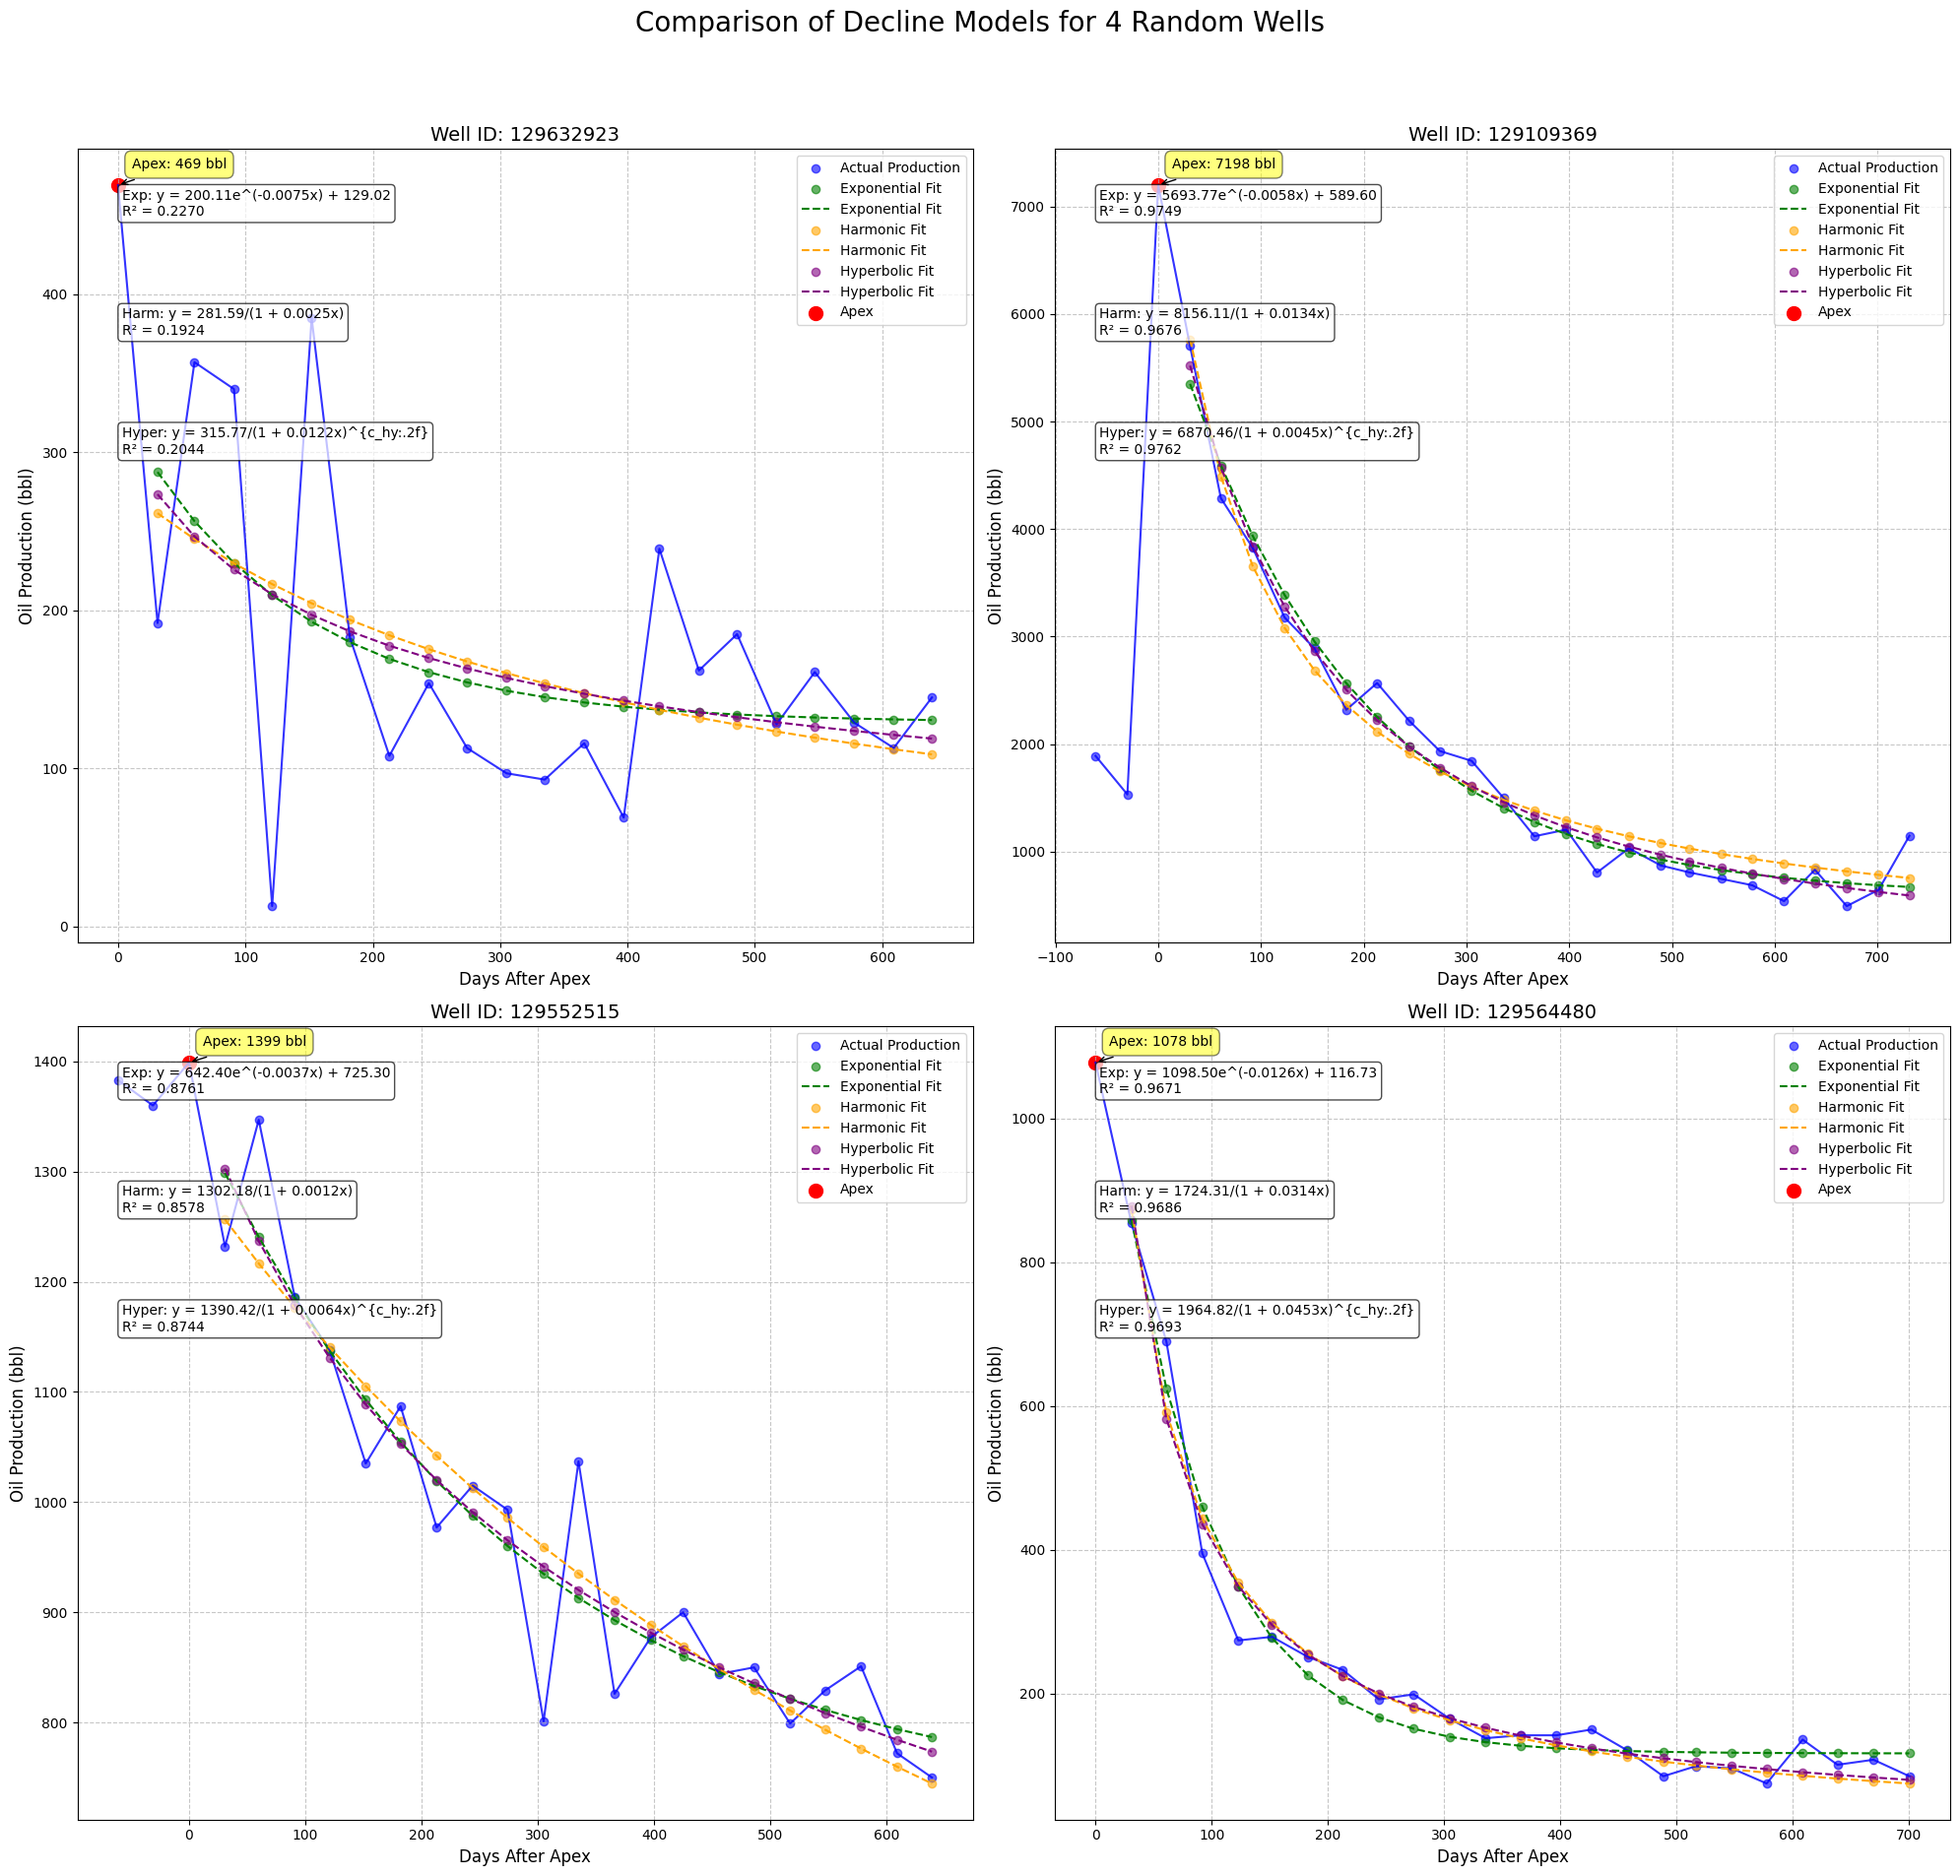


R² Summary for All Models:
       Exponential_R2   Harmonic_R2  Hyperbolic_R2
count    2.741000e+03  2.741000e+03   2.741000e+03
mean     8.444051e-01  8.201406e-01   8.417852e-01
std      2.053356e-01  2.244500e-01   2.157259e-01
min     -1.185995e-08 -5.551115e-14  -2.149592e-11
25%      8.152979e-01  7.799749e-01   8.136321e-01
50%      9.270324e-01  9.115454e-01   9.303775e-01
75%      9.704006e-01  9.617561e-01   9.751963e-01
max      1.000000e+00  9.994800e-01   1.000000e+00


In [18]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define decline functions
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def harmonic_decline(x, a, b):
    return a / (1 + b * x)

def hyperbolic_decline(x, a, b, c):
    return a / (1 + b * x)**c

# Function to fit a model and return fitted parameters and R2
def fit_model(model_func, x, y, p0, bounds=(-np.inf, np.inf)):
    try:
        popt, _ = curve_fit(model_func, x, y, p0=p0, bounds=bounds, maxfev=10000)
        y_pred = model_func(x, *popt)
        residuals = y - y_pred
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        return popt, y_pred, r_squared
    except (RuntimeError, ValueError):
        return None, np.full_like(x, np.nan), np.nan

# Initialize new columns
new_df['DCA1_oil_bbl'] = np.nan
new_df['DCA_ha'] = np.nan
new_df['DCA_hy'] = np.nan

# Initialize dictionaries to store parameters and R2
params_exp = {}
params_ha = {}
params_hy = {}
r2_exp = {}
r2_ha = {}
r2_hy = {}

# Iterate over each well to fit models
for well_id, group in new_df.groupby('well_id'):
    # Sort by production_days_after_apex
    group_sorted = group.sort_values('production_days_after_apex')
    
    # Extract x and y for production_days_after_apex >0
    x = group_sorted[group_sorted['production_days_after_apex'] > 0]['production_days_after_apex'].values
    y = group_sorted[group_sorted['production_days_after_apex'] > 0]['oil_bbl'].values
    
    if len(x) < 3:
        # Not enough data points to fit models
        continue
    
    # Fit Exponential Decay
    popt_exp, y_pred_exp, r2_e = fit_model(
        exp_decay, x, y, 
        p0=[y.max(), 0.01, y.min()], 
        bounds=(0, np.inf)
    )
    
    if popt_exp is not None:
        # Predict for all production_days_after_apex >0
        mask = group_sorted['production_days_after_apex'] > 0
        new_df.loc[mask & (new_df['well_id'] == well_id), 'DCA1_oil_bbl'] = exp_decay(x, *popt_exp)
        params_exp[well_id] = popt_exp
        r2_exp[well_id] = r2_e
    
    # Fit Harmonic Decline
    popt_ha, y_pred_ha, r2_h = fit_model(
        harmonic_decline, x, y, 
        p0=[y.max(), 0.01], 
        bounds=(0, np.inf)
    )
    
    if popt_ha is not None:
        new_df.loc[mask & (new_df['well_id'] == well_id), 'DCA_ha'] = harmonic_decline(x, *popt_ha)
        params_ha[well_id] = popt_ha
        r2_ha[well_id] = r2_h
    
    # Fit Hyperbolic Decline
    popt_hy, y_pred_hy, r2_hy_val = fit_model(
        hyperbolic_decline, x, y, 
        p0=[y.max(), 0.01, 0.5], 
        bounds=(0, [np.inf, np.inf, 3])
    )
    
    if popt_hy is not None:
        new_df.loc[mask & (new_df['well_id'] == well_id), 'DCA_hy'] = hyperbolic_decline(x, *popt_hy)
        params_hy[well_id] = popt_hy
        r2_hy[well_id] = r2_hy_val

# Display some statistics
total_wells = new_df['well_id'].nunique()
successful_exp = len(params_exp)
successful_ha = len(params_ha)
successful_hy = len(params_hy)

print(f"Total number of wells: {total_wells}")
print(f"Wells with successful Exponential fit: {successful_exp}")
print(f"Wells with successful Harmonic fit: {successful_ha}")
print(f"Wells with successful Hyperbolic fit: {successful_hy}")

# Select 4 random wells with successful fits
successful_wells = list(set(params_exp.keys()) & set(params_ha.keys()) & set(params_hy.keys()))
if len(successful_wells) < 4:
    print("Not enough wells with successful fits to select 4 unique wells.")
    selected_wells = successful_wells
else:
    selected_wells = np.random.choice(successful_wells, 4, replace=False)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Comparison of Decline Models for 4 Random Wells', fontsize=20)
axs = axs.flatten()

for i, well_id in enumerate(selected_wells):
    ax = axs[i]
    well_data = new_df[new_df['well_id'] == well_id].sort_values('production_days_after_apex')
    
    # Actual data
    ax.scatter(well_data['production_days_after_apex'], well_data['oil_bbl'], 
               color='blue', alpha=0.6, label='Actual Production')
    ax.plot(well_data['production_days_after_apex'], well_data['oil_bbl'], 
            color='blue', alpha=0.8)
    
    # Exponential Predictions
    exp_pred = well_data['DCA1_oil_bbl']
    mask_exp = well_data['DCA1_oil_bbl'].notna()
    ax.scatter(well_data['production_days_after_apex'][mask_exp], exp_pred[mask_exp], 
               color='green', alpha=0.6, label='Exponential Fit')
    ax.plot(well_data['production_days_after_apex'][mask_exp], exp_pred[mask_exp], 
            color='green', linestyle='--', label='Exponential Fit')
    
    # Harmonic Predictions
    ha_pred = well_data['DCA_ha']
    mask_ha = well_data['DCA_ha'].notna()
    ax.scatter(well_data['production_days_after_apex'][mask_ha], ha_pred[mask_ha], 
               color='orange', alpha=0.6, label='Harmonic Fit')
    ax.plot(well_data['production_days_after_apex'][mask_ha], ha_pred[mask_ha], 
            color='orange', linestyle='--', label='Harmonic Fit')
    
    # Hyperbolic Predictions
    hy_pred = well_data['DCA_hy']
    mask_hy = well_data['DCA_hy'].notna()
    ax.scatter(well_data['production_days_after_apex'][mask_hy], hy_pred[mask_hy], 
               color='purple', alpha=0.6, label='Hyperbolic Fit')
    ax.plot(well_data['production_days_after_apex'][mask_hy], hy_pred[mask_hy], 
            color='purple', linestyle='--', label='Hyperbolic Fit')
    
    # Annotations for Exponential
    if well_id in params_exp:
        a, b, c = params_exp[well_id]
        equation_exp = f"Exp: y = {a:.2f}e^(-{b:.4f}x) + {c:.2f}"
        r2_e = r2_exp[well_id]
        ax.text(0.05, 0.95, f"{equation_exp}\nR² = {r2_e:.4f}", 
                transform=ax.transAxes, fontsize=10, verticalalignment='top', 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))
    
    # Annotations for Harmonic
    if well_id in params_ha:
        a_ha, b_ha = params_ha[well_id]
        equation_ha = f"Harm: y = {a_ha:.2f}/(1 + {b_ha:.4f}x)"
        r2_h = r2_ha[well_id]
        ax.text(0.05, 0.80, f"{equation_ha}\nR² = {r2_h:.4f}", 
                transform=ax.transAxes, fontsize=10, verticalalignment='top', 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))
    
    # Annotations for Hyperbolic
    if well_id in params_hy:
        a_hy, b_hy, c_hy = params_hy[well_id]
        equation_hy = f"Hyper: y = {a_hy:.2f}/(1 + {b_hy:.4f}x)^{{c_hy:.2f}}"
        r2_hy_val = r2_hy[well_id]
        ax.text(0.05, 0.65, f"{equation_hy}\nR² = {r2_hy_val:.4f}", 
                transform=ax.transAxes, fontsize=10, verticalalignment='top', 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))
    
    # Apex Point
    apex = well_data[well_data['production_days_after_apex'] == 0]
    if not apex.empty:
        ax.scatter(apex['production_days_after_apex'], apex['oil_bbl'], 
                   color='red', s=100, label='Apex')
        ax.annotate(f"Apex: {apex['oil_bbl'].values[0]:.0f} bbl", 
                    xy=(0, apex['oil_bbl'].values[0]), 
                    xytext=(10, 10), textcoords='offset points', 
                    ha='left', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    # Customize plot
    ax.set_title(f'Well ID: {well_id}', fontsize=14)
    ax.set_xlabel('Days After Apex', fontsize=12)
    ax.set_ylabel('Oil Production (bbl)', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Calculate and compare R² for all models
r2_summary = pd.DataFrame({
    'Exponential_R2': pd.Series(r2_exp),
    'Harmonic_R2': pd.Series(r2_ha),
    'Hyperbolic_R2': pd.Series(r2_hy)
})

# Display summary statistics
print("\nR² Summary for All Models:")
print(r2_summary.describe())

# Optional: Save the updated DataFrame
# new_df.to_csv('data/Production_Time_Series_with_DCA_predictions.csv', index=False)

In [19]:
new_df.to_csv('data/Production_Time_Series_with_DCA_predictions.csv', index=False)

In [20]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Define decline functions
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def harmonic_decline(x, a, b):
    return a / (1 + b * x)

def hyperbolic_decline(x, a, b, c):
    return a / (1 + b * x)**c

# Function to fit a model and return fitted parameters and R2
def fit_model(model_func, x, y, p0, bounds=(-np.inf, np.inf)):
    try:
        popt, _ = curve_fit(model_func, x, y, p0=p0, bounds=bounds, maxfev=10000)
        y_pred = model_func(x, *popt)
        r_squared = r2_score(y, y_pred)
        return popt, y_pred, r_squared
    except (RuntimeError, ValueError):
        return None, np.full_like(x, np.nan), np.nan

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size=3, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Function to prepare data for LSTM
def prepare_data(data, seq_length=3):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

# Function to fit LSTM model
def fit_lstm(x, y_actual, y_exp, seq_length=3, epochs=200, patience=10):
    if np.isnan(x).any() or np.isnan(y_actual).any() or np.isnan(y_exp).any():
        return np.full_like(y_actual, np.nan), np.nan
    
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(np.column_stack((y_actual, y_exp, x)))
    
    X, y_train = prepare_data(data_scaled, seq_length)
    X = torch.FloatTensor(X)
    y_train = torch.FloatTensor(y_train)
    
    model = LSTMModel(input_size=3)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    
    best_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs.squeeze(), y_train)
        loss.backward()
        optimizer.step()
        
        if loss < best_loss:
            best_loss = loss
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            break
    
    model.eval()
    with torch.no_grad():
        X_full = torch.FloatTensor([data_scaled[i:i+seq_length] for i in range(len(data_scaled)-seq_length+1)])
        y_pred = model(X_full).numpy().flatten()
    
    y_pred_original = scaler.inverse_transform(np.column_stack((y_pred, np.zeros_like(y_pred), np.zeros_like(y_pred))))[:, 0]
    r2 = r2_score(y_actual[seq_length-1:], y_pred_original)
    
    return y_pred_original, r2

# Load your data
new_df = pd.read_csv('data/Production_Time_Series_prepared.csv')

# Initialize dictionaries to store parameters and R² scores
params_exp, r2_exp = {}, {}
params_ha, r2_ha = {}, {}
params_hy, r2_hy = {}, {}
r2_lstm = {}

# Initialize new columns for model predictions
new_df['DCA1_oil_bbl'] = np.nan
new_df['DCA_ha'] = np.nan
new_df['DCA_hy'] = np.nan
new_df['LSTM_pred'] = np.nan

# Iterate over each well to fit models
for well_id, group in new_df.groupby('well_id'):
    group_sorted = group.sort_values('production_days_after_apex')
    
    mask = group_sorted['production_days_after_apex'] > 0
    x = group_sorted[mask]['production_days_after_apex'].values
    y = group_sorted[mask]['oil_bbl'].values
    
    if len(x) < 5 or np.isnan(x).any() or np.isnan(y).any():
        continue
    
    # Fit Exponential Decay
    popt_exp, y_pred_exp, r2_e = fit_model(exp_decay, x, y, p0=[y.max(), 0.01, y.min()], bounds=(0, np.inf))
    if popt_exp is not None:
        new_df.loc[group_sorted[mask].index, 'DCA1_oil_bbl'] = y_pred_exp
        params_exp[well_id], r2_exp[well_id] = popt_exp, r2_e
    
    # Fit Harmonic Decline
    popt_ha, y_pred_ha, r2_h = fit_model(harmonic_decline, x, y, p0=[y.max(), 0.01], bounds=(0, np.inf))
    if popt_ha is not None:
        new_df.loc[group_sorted[mask].index, 'DCA_ha'] = y_pred_ha
        params_ha[well_id], r2_ha[well_id] = popt_ha, r2_h
    
    # Fit Hyperbolic Decline
    popt_hy, y_pred_hy, r2_hy_val = fit_model(hyperbolic_decline, x, y, p0=[y.max(), 0.01, 0.5], bounds=(0, [np.inf, np.inf, 3]))
    if popt_hy is not None:
        new_df.loc[group_sorted[mask].index, 'DCA_hy'] = y_pred_hy
        params_hy[well_id], r2_hy[well_id] = popt_hy, r2_hy_val
    
    # Fit LSTM
    y_pred_lstm, r2_lstm_val = fit_lstm(x, y, y_pred_exp)
    if not np.all(np.isnan(y_pred_lstm)):
        new_df.loc[group_sorted[mask].index[-len(y_pred_lstm):], 'LSTM_pred'] = y_pred_lstm
        r2_lstm[well_id] = r2_lstm_val

# Display some statistics
total_wells = new_df['well_id'].nunique()
successful_exp = len(params_exp)
successful_ha = len(params_ha)
successful_hy = len(params_hy)
successful_lstm = len(r2_lstm)

print(f"Total number of wells: {total_wells}")
print(f"Wells with successful Exponential fit: {successful_exp}")
print(f"Wells with successful Harmonic fit: {successful_ha}")
print(f"Wells with successful Hyperbolic fit: {successful_hy}")
print(f"Wells with successful LSTM fit: {successful_lstm}")



/var/folders/nb/f4s8fppj0j3gshk7xfn2cwf00000gn/T/ipykernel_36932/2915216865.py:93: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  X_full = torch.FloatTensor([data_scaled[i:i+seq_length] for i in range(len(data_scaled)-seq_length+1)])


Total number of wells: 2921
Wells with successful Exponential fit: 2723
Wells with successful Harmonic fit: 2723
Wells with successful Hyperbolic fit: 2723
Wells with successful LSTM fit: 2723


Number of wells with successful fits: 2723
Selected wells: [129070703 129095532 129581289 129095445]

Well ID: 129070703
Total data points: 29
Data points after apex: 20
Exponential predictions: 20
Harmonic predictions: 20
Hyperbolic predictions: 20
LSTM predictions: 18

Well ID: 129095532
Total data points: 28
Data points after apex: 23
Exponential predictions: 23
Harmonic predictions: 23
Hyperbolic predictions: 23
LSTM predictions: 21

Well ID: 129581289
Total data points: 22
Data points after apex: 5
Exponential predictions: 5
Harmonic predictions: 5
Hyperbolic predictions: 5
LSTM predictions: 3

Well ID: 129095445
Total data points: 34
Data points after apex: 33
Exponential predictions: 33
Harmonic predictions: 33
Hyperbolic predictions: 33
LSTM predictions: 31


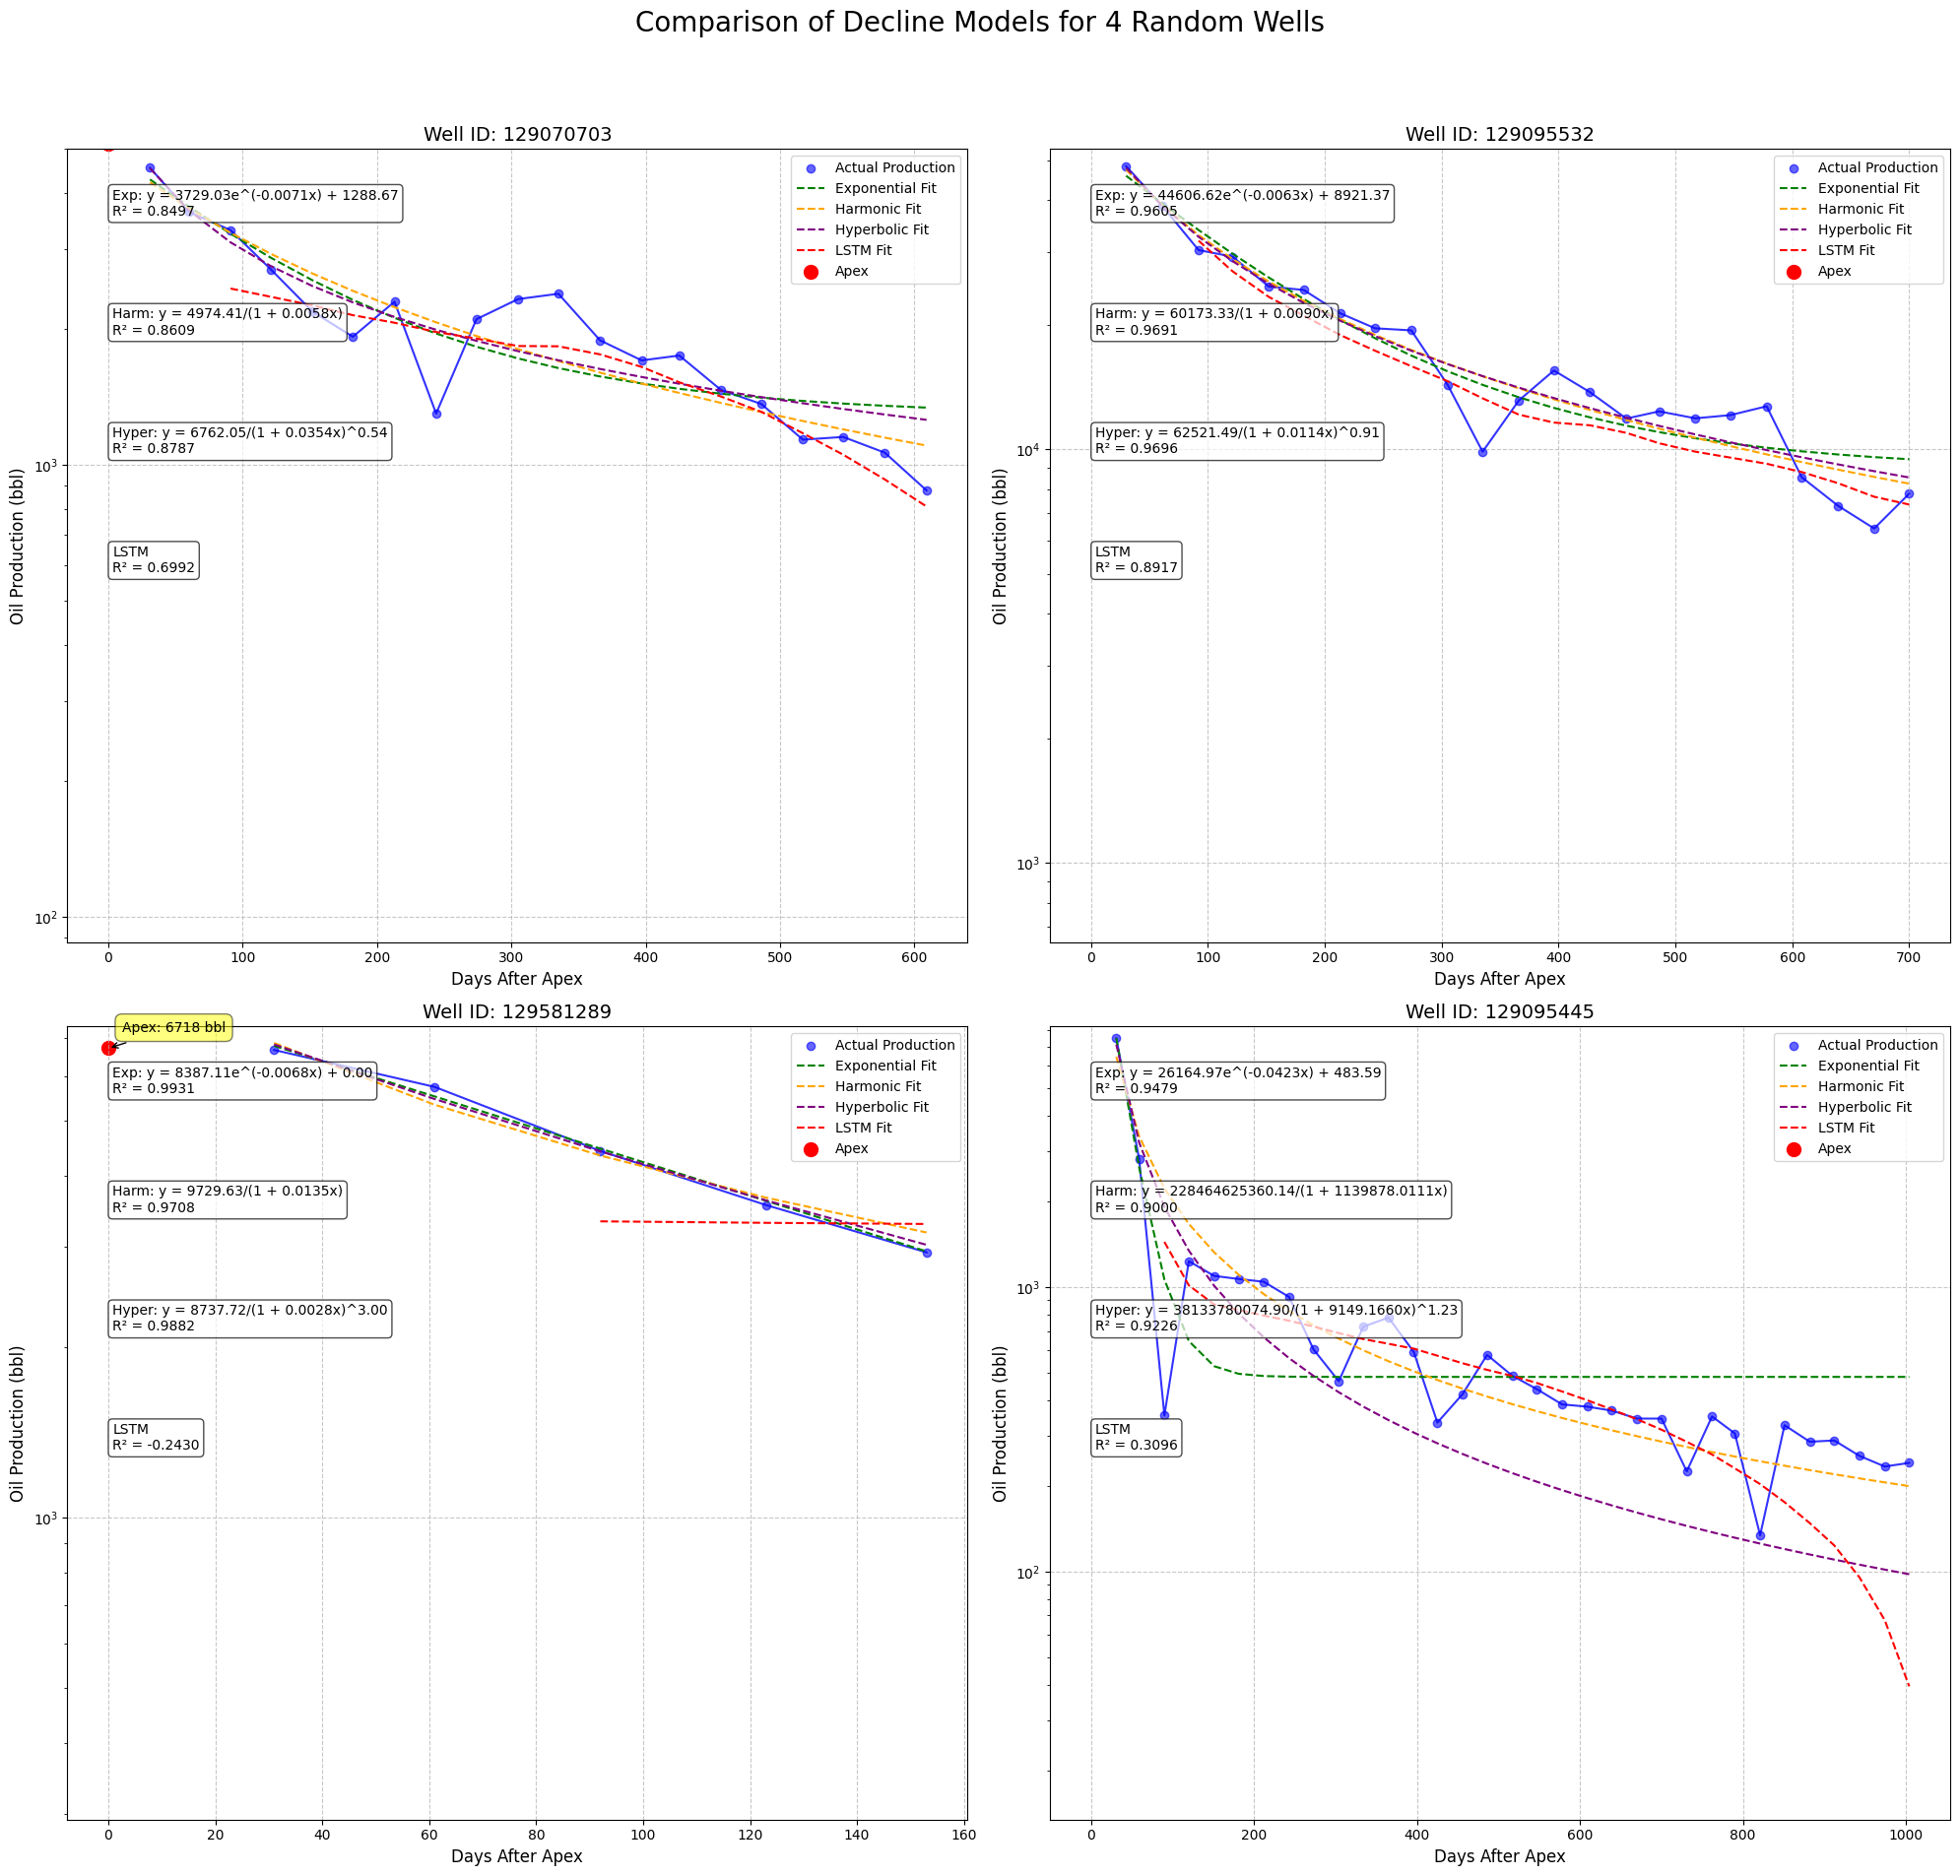


R² Summary for All Models:
       Exponential_R2   Harmonic_R2  Hyperbolic_R2      LSTM_R2
count    2.723000e+03  2.723000e+03   2.723000e+03  2723.000000
mean     8.447734e-01  8.210321e-01   8.425411e-01     0.665784
std      2.046371e-01  2.235461e-01   2.148995e-01     0.356693
min     -1.185995e-08 -5.551115e-14  -2.149592e-11    -3.462324
25%      8.156394e-01  7.813685e-01   8.142209e-01     0.526193
50%      9.270324e-01  9.116965e-01   9.305300e-01     0.832094
75%      9.703405e-01  9.617827e-01   9.753149e-01     0.910949
max      9.983954e-01  9.988189e-01   9.988319e-01     0.970134


In [21]:
# Select 4 random wells with successful fits for all models
successful_wells = list(set(params_exp.keys()) & set(params_ha.keys()) & set(params_hy.keys()) & set(r2_lstm.keys()))
if len(successful_wells) < 4:
    print("Not enough wells with successful fits to select 4 unique wells.")
    selected_wells = successful_wells
else:
    selected_wells = np.random.choice(successful_wells, 4, replace=False)

# Debug information
print(f"Number of wells with successful fits: {len(successful_wells)}")
print(f"Selected wells: {selected_wells}")

for well_id in selected_wells:
    well_data = new_df[new_df['well_id'] == well_id]
    print(f"\nWell ID: {well_id}")
    print(f"Total data points: {len(well_data)}")
    print(f"Data points after apex: {len(well_data[well_data['production_days_after_apex'] > 0])}")
    print(f"Exponential predictions: {well_data['DCA1_oil_bbl'].notna().sum()}")
    print(f"Harmonic predictions: {well_data['DCA_ha'].notna().sum()}")
    print(f"Hyperbolic predictions: {well_data['DCA_hy'].notna().sum()}")
    print(f"LSTM predictions: {well_data['LSTM_pred'].notna().sum()}")

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Comparison of Decline Models for 4 Random Wells', fontsize=20)
axs = axs.flatten()

for i, well_id in enumerate(selected_wells):
    ax = axs[i]
    well_data = new_df[new_df['well_id'] == well_id].sort_values('production_days_after_apex')
    
    # Check if well_data is empty
    if well_data.empty:
        ax.text(0.5, 0.5, f"No data for Well ID: {well_id}", ha='center', va='center')
        continue
    
    # Actual data
    mask = well_data['production_days_after_apex'] > 0
    ax.scatter(well_data.loc[mask, 'production_days_after_apex'], well_data.loc[mask, 'oil_bbl'], 
               color='blue', alpha=0.6, label='Actual Production')
    ax.plot(well_data.loc[mask, 'production_days_after_apex'], well_data.loc[mask, 'oil_bbl'], 
            color='blue', alpha=0.8)
    
    # Exponential Predictions
    mask_exp = well_data['DCA1_oil_bbl'].notna() & mask
    if mask_exp.any():
        ax.plot(well_data.loc[mask_exp, 'production_days_after_apex'], well_data.loc[mask_exp, 'DCA1_oil_bbl'], 
                color='green', linestyle='--', label='Exponential Fit')
    
    # Harmonic Predictions
    mask_ha = well_data['DCA_ha'].notna() & mask
    if mask_ha.any():
        ax.plot(well_data.loc[mask_ha, 'production_days_after_apex'], well_data.loc[mask_ha, 'DCA_ha'], 
                color='orange', linestyle='--', label='Harmonic Fit')
    
    # Hyperbolic Predictions
    mask_hy = well_data['DCA_hy'].notna() & mask
    if mask_hy.any():
        ax.plot(well_data.loc[mask_hy, 'production_days_after_apex'], well_data.loc[mask_hy, 'DCA_hy'], 
                color='purple', linestyle='--', label='Hyperbolic Fit')
    
    # LSTM Predictions
    mask_lstm = well_data['LSTM_pred'].notna() & mask
    if mask_lstm.any():
        ax.plot(well_data.loc[mask_lstm, 'production_days_after_apex'], well_data.loc[mask_lstm, 'LSTM_pred'], 
                color='red', linestyle='--', label='LSTM Fit')
    
    # Annotations for all models
    y_pos = 0.95
    for model, params, r2 in [('Exp', params_exp, r2_exp), 
                              ('Harm', params_ha, r2_ha), 
                              ('Hyper', params_hy, r2_hy), 
                              ('LSTM', None, r2_lstm)]:
        if well_id in r2:
            if params and well_id in params:
                if model == 'Exp':
                    a, b, c = params[well_id]
                    equation = f"{model}: y = {a:.2f}e^(-{b:.4f}x) + {c:.2f}"
                elif model == 'Harm':
                    a, b = params[well_id]
                    equation = f"{model}: y = {a:.2f}/(1 + {b:.4f}x)"
                elif model == 'Hyper':
                    a, b, c = params[well_id]
                    equation = f"{model}: y = {a:.2f}/(1 + {b:.4f}x)^{c:.2f}"
                else:
                    equation = f"{model}"
            else:
                equation = f"{model}"
            
            ax.text(0.05, y_pos, f"{equation}\nR² = {r2[well_id]:.4f}", 
                    transform=ax.transAxes, fontsize=10, verticalalignment='top', 
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))
            y_pos -= 0.15
    
    # Apex Point
    apex = well_data[well_data['production_days_after_apex'] == 0]
    if not apex.empty:
        ax.scatter(apex['production_days_after_apex'], apex['oil_bbl'], 
                   color='red', s=100, label='Apex')
        ax.annotate(f"Apex: {apex['oil_bbl'].values[0]:.0f} bbl", 
                    xy=(0, apex['oil_bbl'].values[0]), 
                    xytext=(10, 10), textcoords='offset points', 
                    ha='left', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    # Customize plot
    ax.set_title(f'Well ID: {well_id}', fontsize=14)
    ax.set_xlabel('Days After Apex', fontsize=12)
    ax.set_ylabel('Oil Production (bbl)', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

    # Set y-axis to log scale
    ax.set_yscale('log')

    # Adjust y-axis limits
    y_min = well_data.loc[mask, 'oil_bbl'].min()
    y_max = well_data.loc[mask, 'oil_bbl'].max()
    ax.set_ylim(max(0.1, y_min / 10), y_max * 1.1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Calculate and compare R² for all models
r2_summary = pd.DataFrame({
    'Exponential_R2': pd.Series(r2_exp),
    'Harmonic_R2': pd.Series(r2_ha),
    'Hyperbolic_R2': pd.Series(r2_hy),
    'LSTM_R2': pd.Series(r2_lstm)
})

# Display summary statistics
print("\nR² Summary for All Models:")
print(r2_summary.describe())

# Optional: Save the updated DataFrame
# new_df.to_csv('data/Production_Time_Series_with_Advanced_DCA_predictions.csv', index=False)

In [22]:
new_df.head()


,well_id,uwi_id,uwi_list,production_date,oil_bbl,gas_mcf,water_bbl,well_count,production_days,prod_start_date,apex_bbl,apex_date,production_days_after_apex,DCA1_oil_bbl,DCA_ha,DCA_hy,LSTM_pred
0,-189988,42041324380000,420413243800,2016-02-01,2728.0,7469.0,0.0,1,1,2016-02-01,24944.0,2016-03-01,-29,NaN,NaN,NaN,NaN
1,-189988,42041324380000,420413243800,2016-03-01,24944.0,78107.0,0.0,1,30,2016-02-01,24944.0,2016-03-01,0,NaN,NaN,NaN,NaN
2,-189988,42041324380000,420413243800,2016-04-01,13606.0,52354.0,0.0,1,61,2016-02-01,24944.0,2016-03-01,31,12796.056941,13470.548553,13398.347941,NaN
3,-189988,42041324380000,420413243800,2016-05-01,9672.0,38441.0,0.0,1,91,2016-02-01,24944.0,2016-03-01,61,10379.400301,10026.445165,10079.572186,NaN
4,-189988,42041324380000,420413243800,2016-06-01,7716.0,28326.0,0.0,1,122,2016-02-01,24944.0,2016-03-01,92,8444.880500,7931.064931,8000.616702,7544.071289
